In [13]:
import pandas as pd
from linear_tree import Node,rmse

In [2]:
train=pd.read_csv("/Users/tarekbenzina/Downloads/Data/train.csv")

/var/folders/k3/m1n4gmjx38s1cbrtz3jmb2kc0000gq/T/ipykernel_27533/1078126586.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train=pd.read_csv("/Users/tarekbenzina/Downloads/Data/train.csv")


In [3]:
stores=pd.read_csv("/Users/tarekbenzina/Downloads/Data/store.csv")

In [4]:
train.StateHoliday=train.StateHoliday.astype(str)

In [5]:
train["Date"]=pd.to_datetime(train.Date)

In [6]:
train["woy"]=train.Date.dt.isocalendar().week

In [7]:
train.Store.nunique()

1115

In [8]:
categoricals=[
            'Store',
              'DayOfWeek',
              'Open',
              'Promo',
               'StateHoliday', 
              'SchoolHoliday', 
              'woy'
             ]
numericals=['Customers']
target="Sales"

In [9]:
train_data=train[train.Date<"2015-01-01"]
val_data=train[train.Date>="2015-01-01"]

In [10]:
train_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,woy
236380,1,3,2014-12-31,2605,327,1,0,0,1,1
236381,2,3,2014-12-31,2269,252,1,0,0,1,1
236382,3,3,2014-12-31,3804,408,1,0,0,1,1
236383,4,3,2014-12-31,10152,1311,1,0,0,1,1
236384,5,3,2014-12-31,1830,217,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,1


In [23]:
tree.decision

{'split_feature': 'Open_enc',
 'split_value': 6915.541807308765,
 'right_grow': True,
 'left_grow': True,
 'right_lm': ElasticNet(l1_ratio=1, selection='random'),
 'left_lm': ElasticNet(l1_ratio=1, selection='random'),
 'right_train':        Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
 1        142          6 2013-09-14   2801        353     1      0   
 2        378          6 2014-06-14   6276        977     1      0   
 3       1043          2 2014-11-11   8278       1075     1      1   
 4        179          1 2014-07-28   9620       1049     1      1   
 5         54          6 2013-07-13   8873        860     1      0   
 ...      ...        ...        ...    ...        ...   ...    ...   
 78076    646          1 2013-07-15   6900        866     1      1   
 78077    767          3 2013-01-02   6087        666     1      0   
 78079    623          2 2014-05-06   8252        943     1      1   
 78080    951          3 2013-06-12   5827        625     1      0

In [24]:
subset=train_data.sample(frac=.1)
for i in range(0,20):
    print(f"training tree {i}")
    tree=Node(
        numerical_features=numericals,
        categorical_features=categoricals,
        categorical_features_enc=[],
        target=target,
        max_depth=5,
        bin_size=1000,
        feature_fraction=.2,
        max_bins=100,
        l1_ratio=1,
    )
    
    tree.fit(subset,val_data)
    train_data=train_data.reset_index(drop=True)
    val_data=val_data.reset_index(drop=True)
    val_data[f"pred_{i}"]=tree.predict(val_data)
    train_data[f"pred_{i}"]=tree.predict(train_data)
    
    val_data["pred"]=val_data[[f"pred_{x}" for x in range(0,i+1)]].mean(axis=1)
    train_data["pred"]=train_data[[f"pred_{x}" for x in range(0,i+1)]].mean(axis=1)
    train_data["error"]=(train_data["pred"]-train_data.Sales).abs()
    subset=train_data.sort_values("error").tail(50000)
    print("train error ",rmse(train_data.pred,train_data.Sales))
    print("val error ",rmse(val_data.pred,val_data.Sales))

training tree 0


11:21:15 INFO:    Training at depth 1
11:21:20 INFO:    MSE on train: 1228.0570211921313
11:21:21 INFO:    MSE on validation: 1299.7573655921926
11:21:21 INFO:    Training at depth 2
/Users/tarekbenzina/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
11:21:25 INFO:    MSE on train: 1176.0628387909026
11:21:27 INFO:    MSE on validation: 1253.8186172105698
11:21:27 INFO:    Training at depth 3
/Users/tarekbenzina/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, 

train error  1114.5745323228666
val error  1174.915616640723
training tree 1


11:22:02 INFO:    Training at depth 1
11:22:03 INFO:    MSE on train: 2011.5232120037601
11:22:04 INFO:    MSE on validation: 3937.912061909638
11:22:04 INFO:    Training at depth 2
11:22:07 INFO:    MSE on train: 1967.2417134910434
11:22:08 INFO:    MSE on validation: 3673.105472778681
11:22:08 INFO:    Training at depth 3
11:22:12 INFO:    MSE on train: 1909.87357219086
11:22:14 INFO:    MSE on validation: 2543.052156303502
11:22:14 INFO:    Training at depth 4
11:22:21 INFO:    MSE on train: 1843.0545825270644
11:22:22 INFO:    MSE on validation: 2475.311788828356
11:22:22 INFO:    Training at depth 5
11:22:34 INFO:    MSE on train: 1770.0558186717342
11:22:35 INFO:    MSE on validation: 2580.533612100724
11:22:43 INFO:    Training at depth 1


train error  1581.9266562477194
val error  1471.214045640291
training tree 2


11:22:45 INFO:    MSE on train: 2158.2115781801767
11:22:46 INFO:    MSE on validation: 1823.5476819728915
11:22:46 INFO:    Training at depth 2
11:22:50 INFO:    MSE on train: 2050.4233405547925
11:22:51 INFO:    MSE on validation: 1898.6828048862587
11:22:51 INFO:    Training at depth 3
/Users/tarekbenzina/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
11:22:55 INFO:    MSE on train: 1988.9298791043932
11:22:56 INFO:    MSE on validation: 1894.7583063087018
11:22:56 INFO:    Training at depth 4
/Users/tarekbenzina/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of 

train error  1212.7688255276594
val error  1188.9507874936903
training tree 3


/Users/tarekbenzina/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
11:23:23 INFO:    MSE on train: 2505.652940388065
11:23:24 INFO:    MSE on validation: 2104.2920427008767
11:23:24 INFO:    Training at depth 2
/Users/tarekbenzina/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
11:23:27 INFO:    MSE on train: 2469.6637408477854
11:23:28 INFO:    MSE on validation: 1955.4159010972844
11:23:28 INFO

train error  1071.2410772528476
val error  1064.134544131269
training tree 4


11:23:56 INFO:    Training at depth 1
/Users/tarekbenzina/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
11:23:57 INFO:    MSE on train: 2714.2531994479546
11:23:59 INFO:    MSE on validation: 1635.9916557558738
11:23:59 INFO:    Training at depth 2
/Users/tarekbenzina/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
11:24:01 INFO:    MSE on train: 2665.724128641527
11:24:03 INFO:    MSE on valida

train error  983.1160260872057
val error  995.754210467955
training tree 5


11:24:31 INFO:    MSE on train: 2458.6485743968947
11:24:32 INFO:    MSE on validation: 1973.4766916434614
11:24:32 INFO:    Training at depth 2
/Users/tarekbenzina/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.898e+09, tolerance: 1.695e+07
  model = cd_fast.enet_coordinate_descent(
11:24:36 INFO:    MSE on train: 2362.218946784697
11:24:37 INFO:    MSE on validation: 1640.628594165006
11:24:37 INFO:    Training at depth 3
/Users/tarekbenzina/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.510e+08, tolerance: 1.070e+06
  model = cd_fast.e

train error  925.6342998643751
val error  926.0474923653305
training tree 6


11:25:09 INFO:    Training at depth 1
/Users/tarekbenzina/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.271e+10, tolerance: 3.295e+07
  model = cd_fast.enet_coordinate_descent(
11:25:12 INFO:    MSE on train: 2470.857100211111
11:25:13 INFO:    MSE on validation: 1506.3263707436026
11:25:13 INFO:    Training at depth 2
/Users/tarekbenzina/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.833e+10, tolerance: 8.947e+06
  model = cd_fast.enet_coordinate_descent(
11:25:16 INFO:    MSE on train: 2410.0346545968678
11:25:18 INFO:    MSE on valida

train error  893.8745624691734
val error  897.9450553497684
training tree 7


11:25:55 INFO:    MSE on train: 2508.054201793642
11:25:56 INFO:    MSE on validation: 1442.3778830060385
11:25:56 INFO:    Training at depth 2
/Users/tarekbenzina/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.542e+10, tolerance: 1.209e+07
  model = cd_fast.enet_coordinate_descent(
11:25:59 INFO:    MSE on train: 2439.2111853340516
11:26:00 INFO:    MSE on validation: 1204.3166553170497
11:26:00 INFO:    Training at depth 3
/Users/tarekbenzina/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.995e+08, tolerance: 1.980e+05
  model = cd_fast.

train error  870.811395098887
val error  878.1767204276101
training tree 8


11:26:32 INFO:    Training at depth 1
11:26:37 INFO:    MSE on train: 2560.1137391481225
11:26:38 INFO:    MSE on validation: 1854.7434649955426
11:26:38 INFO:    Training at depth 2
/Users/tarekbenzina/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.762e+10, tolerance: 1.503e+07
  model = cd_fast.enet_coordinate_descent(
11:26:43 INFO:    MSE on train: 2482.2906229416926
11:26:44 INFO:    MSE on validation: 1604.594613784552
11:26:44 INFO:    Training at depth 3
/Users/tarekbenzina/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.743e+09, t

train error  842.3199854468502
val error  853.2237349721171
training tree 9


11:27:18 INFO:    MSE on train: 2619.1704421887516
11:27:19 INFO:    MSE on validation: 1581.758191978865
11:27:19 INFO:    Training at depth 2
/Users/tarekbenzina/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
11:27:22 INFO:    MSE on train: 2507.0026593025877
11:27:23 INFO:    MSE on validation: 1416.9165093217107
11:27:23 INFO:    Training at depth 3
/Users/tarekbenzina/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.

train error  835.0040060779448
val error  846.6070441918845
training tree 10


11:27:57 INFO:    MSE on train: 2574.4141625680763
11:27:58 INFO:    MSE on validation: 1751.9411189286232
11:27:58 INFO:    Training at depth 2
/Users/tarekbenzina/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.150e+10, tolerance: 1.381e+07
  model = cd_fast.enet_coordinate_descent(
/Users/tarekbenzina/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.419e+10, tolerance: 1.436e+07
  model = cd_fast.enet_coordinate_descent(
11:28:01 INFO:    MSE on train: 2505.2630149544875
11:28:02 INFO:    MSE on validation: 1382.0219003335517
11:28:02 INF

train error  826.8906414699321
val error  839.1881364305614
training tree 11


11:28:34 INFO:    Training at depth 1
/Users/tarekbenzina/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.943e+10, tolerance: 3.001e+07
  model = cd_fast.enet_coordinate_descent(
11:28:42 INFO:    MSE on train: 2519.5019518949275
11:28:43 INFO:    MSE on validation: 1435.9145592443617
11:28:43 INFO:    Training at depth 2
/Users/tarekbenzina/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.497e+10, tolerance: 6.141e+06
  model = cd_fast.enet_coordinate_descent(
11:28:46 INFO:    MSE on train: 2490.0480694232024
11:28:47 INFO:    MSE on valid

train error  824.529094529211
val error  835.0749207214653
training tree 12


/Users/tarekbenzina/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
11:29:25 INFO:    MSE on train: 2618.9985708206746
11:29:26 INFO:    MSE on validation: 1346.454215265609
11:29:26 INFO:    Training at depth 2
/Users/tarekbenzina/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
11:29:29 INFO:    MSE on train: 2512.3378655705633
11:29:30 INFO:    MSE on validation: 1105.669509252864
11:29:30 INFO:

KeyboardInterrupt: 

In [15]:
train_data.reset_index(drop=True)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,woy
0,1,3,2014-12-31,2605,327,1,0,0,1,1
1,2,3,2014-12-31,2269,252,1,0,0,1,1
2,3,3,2014-12-31,3804,408,1,0,0,1,1
3,4,3,2014-12-31,10152,1311,1,0,0,1,1
4,5,3,2014-12-31,1830,217,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
780824,1111,2,2013-01-01,0,0,0,0,a,1,1
780825,1112,2,2013-01-01,0,0,0,0,a,1,1
780826,1113,2,2013-01-01,0,0,0,0,a,1,1
780827,1114,2,2013-01-01,0,0,0,0,a,1,1


In [91]:
train_data["error"]=(train_data["pred_0"]-train_data.Sales).abs().sort_values()

In [93]:
train_data.sort_values("error").tail(10000)

,level_0,index,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,...,pred_23,pred_24,pred_25,pred_26,pred_27,pred_28,pred_29,pred_30,pred_31,error
130180,130180,366560,262,4,2014-08-14,17167,3086,1,0,0,...,20317.812223,21495.230203,19738.039098,20625.223750,21388.649765,21036.682445,21491.634404,20900.972820,20486.254614,3917.246835
557935,557935,794315,106,5,2013-07-19,15459,1207,1,1,0,...,10139.519775,11379.866615,11644.138110,10917.344112,10864.711829,11772.542758,10849.418182,11036.898689,11158.131684,3917.332176
383796,383796,620176,1022,1,2013-12-23,14296,1503,1,0,0,...,9613.507446,10354.875512,9711.514952,11493.223478,8966.618711,10862.090942,9011.099127,8536.284187,9117.368069,3917.923910
336410,336410,572790,466,1,2014-02-03,14311,1159,1,1,0,...,10880.290428,10953.371033,11157.954567,10487.930912,10225.315485,10607.839333,10565.277909,11056.522942,10881.396717,3918.346903
490076,490076,726456,262,3,2013-09-18,16048,2898,1,0,0,...,20045.745544,19990.320308,18720.090860,18809.697714,19791.608600,19923.490807,19732.695923,19627.158473,19599.518471,3918.428965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186591,186591,422971,57,2,2014-06-17,34692,1930,1,1,0,...,14286.147097,13143.900957,12895.165250,13841.198127,15377.706256,12547.906523,12755.485545,14318.699422,14302.879295,21204.123237
452030,452030,688410,126,2,2013-10-22,30619,554,1,1,0,...,6798.692516,6599.869822,6390.820851,6441.706064,6174.652717,6203.156945,6683.893517,5965.714911,6839.753463,23621.290611
187706,187706,424086,57,1,2014-06-16,38037,1970,1,1,0,...,14826.303608,13503.352783,13443.145459,14284.893975,15857.002930,13403.594122,13321.262335,14681.068930,14891.985908,24110.931818
597202,597202,833582,348,5,2013-06-14,33934,1694,1,0,0,...,7843.951305,8890.880510,10061.219433,9949.925145,9645.030384,8178.519620,9433.753822,8573.117545,9242.616852,24426.038871


In [73]:
val_data[[f"pred_{i}" for x in range(0,i+1)]]

,pred_8,pred_8,pred_8,pred_8,pred_8,pred_8,pred_8,pred_8,pred_8
0,5586.426049,5586.426049,5586.426049,5586.426049,5586.426049,5586.426049,5586.426049,5586.426049,5586.426049
1,6182.123601,6182.123601,6182.123601,6182.123601,6182.123601,6182.123601,6182.123601,6182.123601,6182.123601
2,7074.995798,7074.995798,7074.995798,7074.995798,7074.995798,7074.995798,7074.995798,7074.995798,7074.995798
3,10159.049253,10159.049253,10159.049253,10159.049253,10159.049253,10159.049253,10159.049253,10159.049253,10159.049253
4,3920.365433,3920.365433,3920.365433,3920.365433,3920.365433,3920.365433,3920.365433,3920.365433,3920.365433
...,...,...,...,...,...,...,...,...,...
236375,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
236376,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
236377,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
236378,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [69]:
val_data["pred"]=val_data[[f"pred_{i}" for i in range(0,15)]].median(axis=1)

In [70]:
rmse(val_data.pred,val_data.Sales)

1718.3321768326084

<AxesSubplot:xlabel='Date'>

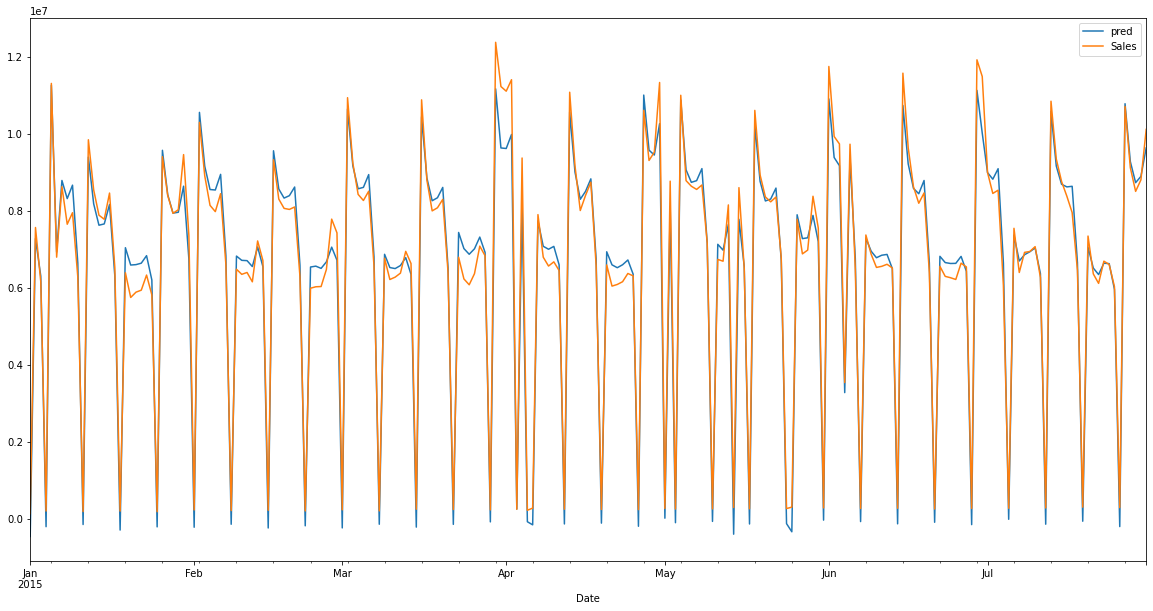

In [18]:
val_data.groupby("Date").agg({"pred":"sum","Sales":"sum"}).plot(figsize=(20,10))




In [12]:
from linear_tree import rmse,apply_mapping

In [13]:
tree.fit(train_data.sample(frac=.3),val_data)

05:37:16 INFO:    Training at depth 1
05:37:27 INFO:    MSE on train: 1203.7189572612533
05:37:28 INFO:    MSE on validation: 1248.5109742342215
05:37:28 INFO:    Training at depth 2
05:37:35 INFO:    MSE on train: 1164.4854385230549
05:37:36 INFO:    MSE on validation: 1215.770845065565
05:37:36 INFO:    Training at depth 3
/Users/tarekbenzina/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
05:37:44 INFO:    MSE on train: 1148.3404842669704
05:37:45 INFO:    MSE on validation: 1200.4870842949922
05:37:45 INFO:    Training at depth 4
/Users/tarekbenzina/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You 

In [38]:
train_data=train_data.reset_index()
val_data=val_data.reset_index()

In [39]:
val_data["pred_1"]=tree.predict(val_data)
train_data["pred_1"]=tree.predict(train_data)

In [43]:
train_data[["pred_1","Sales","Customers"]].corr()

,pred_1,Sales,Customers
pred_1,1.000000,0.969898,0.925186
Sales,0.969898,1.000000,0.897413
Customers,0.925186,0.897413,1.000000


In [47]:
tree_2=Node(
    numerical_features=numericals+["pred_1"],
    categorical_features=categoricals,
    categorical_features_enc=[],
    target=target,
    max_depth=8,
    bin_size=1000,
    feature_fraction=.4,
    max_bins=100,
    l1_ratio=1,
)

In [48]:
tree_2.fit(train_data.sample(frac=.5),val_data)

06:23:16 INFO:    Training at depth 1
06:23:39 INFO:    MSE on train: 934.5958046038322
06:23:40 INFO:    MSE on validation: 1035.3695745883751
06:23:40 INFO:    Training at depth 2
/Users/tarekbenzina/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.888e+07, tolerance: 4.483e+05
  model = cd_fast.enet_coordinate_descent(
06:23:53 INFO:    MSE on train: 934.0741343790619
06:23:54 INFO:    MSE on validation: 1035.130494210734
06:23:54 INFO:    Training at depth 3
/Users/tarekbenzina/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.923e+06, tol

In [ ]:
val_data

In [14]:
x=tree.predict(val_data)

In [15]:
import numpy as np

In [16]:
x.sort_values()

236379        0.000000
208630        0.000000
208629        0.000000
208628        0.000000
133271        0.000000
              ...     
74966     32690.213688
129601    33321.988690
87231     34238.258079
132946    35481.294695
101726    36609.108730
Name: prediction, Length: 236380, dtype: float64

In [17]:
val_data["pred"]=x

/var/folders/k3/m1n4gmjx38s1cbrtz3jmb2kc0000gq/T/ipykernel_92203/1368937439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_data["pred"]=x


<AxesSubplot:xlabel='Date'>

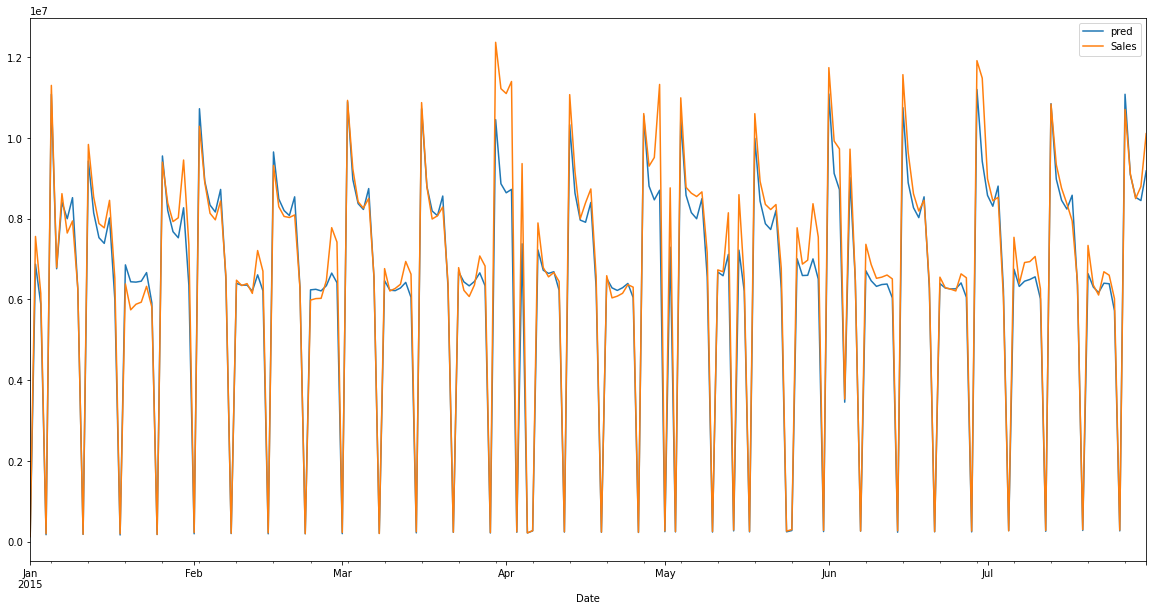

In [19]:
val_data.groupby("Date").agg({"pred":"sum","Sales":"sum"}).plot(figsize=(20,10))

In [20]:
categoricals_enc=tree.categorical_features_enc

In [21]:
train_data_=apply_mapping(train_data,tree.mappings)
val_data_=apply_mapping(val_data,tree.mappings)

In [22]:

import lightgbm as lgb

y_train = train_data_[target]
y_test = val_data_[target]
X_train = train_data_[categoricals_enc+numericals]
X_test = val_data_[categoricals_enc+numericals]

# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'n_estimators':1000,
    'objective': 'regression',
    'metric': {'rmse', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.9,
    'feature_fraction': 1,
    'bagging_fraction': 1,
    'bagging_freq': 1,
    'verbose': 0
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                callbacks=[lgb.early_stopping(stopping_rounds=20)])

04:09:11 DEBUG:    deprecate positional args: graphviz.backend.piping.pipe(['renderer', 'formatter', 'neato_no_op', 'quiet'])
04:09:11 DEBUG:    deprecate positional args: graphviz.backend.rendering.render(['renderer', 'formatter', 'neato_no_op', 'quiet'])
04:09:11 DEBUG:    deprecate positional args: graphviz.backend.unflattening.unflatten(['stagger', 'fanout', 'chain', 'encoding'])
04:09:11 DEBUG:    deprecate positional args: graphviz.backend.viewing.view(['quiet'])
04:09:11 DEBUG:    deprecate positional args: graphviz.quoting.quote(['is_html_string', 'is_valid_id', 'dot_keywords', 'endswith_odd_number_of_backslashes', 'escape_unescaped_quotes'])
04:09:11 DEBUG:    deprecate positional args: graphviz.quoting.a_list(['kwargs', 'attributes'])
04:09:11 DEBUG:    deprecate positional args: graphviz.quoting.attr_list(['kwargs', 'attributes'])
04:09:11 DEBUG:    deprecate positional args: graphviz.dot.Dot.clear(['keep_attrs'])
04:09:11 DEBUG:    deprecate positional args: graphviz.dot.Do

Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.154532 seconds.
You can set `force_col_wise=true` to remove the overhead.
[1]	valid_0's rmse: 1342.41	valid_0's l1: 942.119
Training until validation scores don't improve for 20 rounds
[2]	valid_0's rmse: 1184.72	valid_0's l1: 779.128
[3]	valid_0's rmse: 1155.99	valid_0's l1: 763.568
[4]	valid_0's rmse: 1117.98	valid_0's l1: 745.609
[5]	valid_0's rmse: 1098.69	valid_0's l1: 723.189
[6]	valid_0's rmse: 1088.09	valid_0's l1: 717.86
[7]	valid_0's rmse: 1080.92	valid_0's l1: 716.104
[8]	valid_0's rmse: 1068.4	valid_0's l1: 707.121
[9]	valid_0's rmse: 1060.18	valid_0's l1: 704.024
[10]	valid_0's rmse: 1047.58	valid_0's l1: 695.186
[11]	valid_0's rmse: 1040.59	valid_0's l1: 691.826
[12]	valid_0's rmse: 1034.61	valid_0's l1: 689.595
[13]	valid_0's rmse: 1028.75	valid_0's l1: 685.095
[14]	valid_0's rmse: 1023.93	valid_0's l1: 683.131
[15]	valid_0's rmse: 1023.37	valid_0's l1: 682.709

In [23]:
val_data_["pred_gbm"]=gbm.predict(val_data_[categoricals_enc+numericals])

<AxesSubplot:xlabel='Date'>

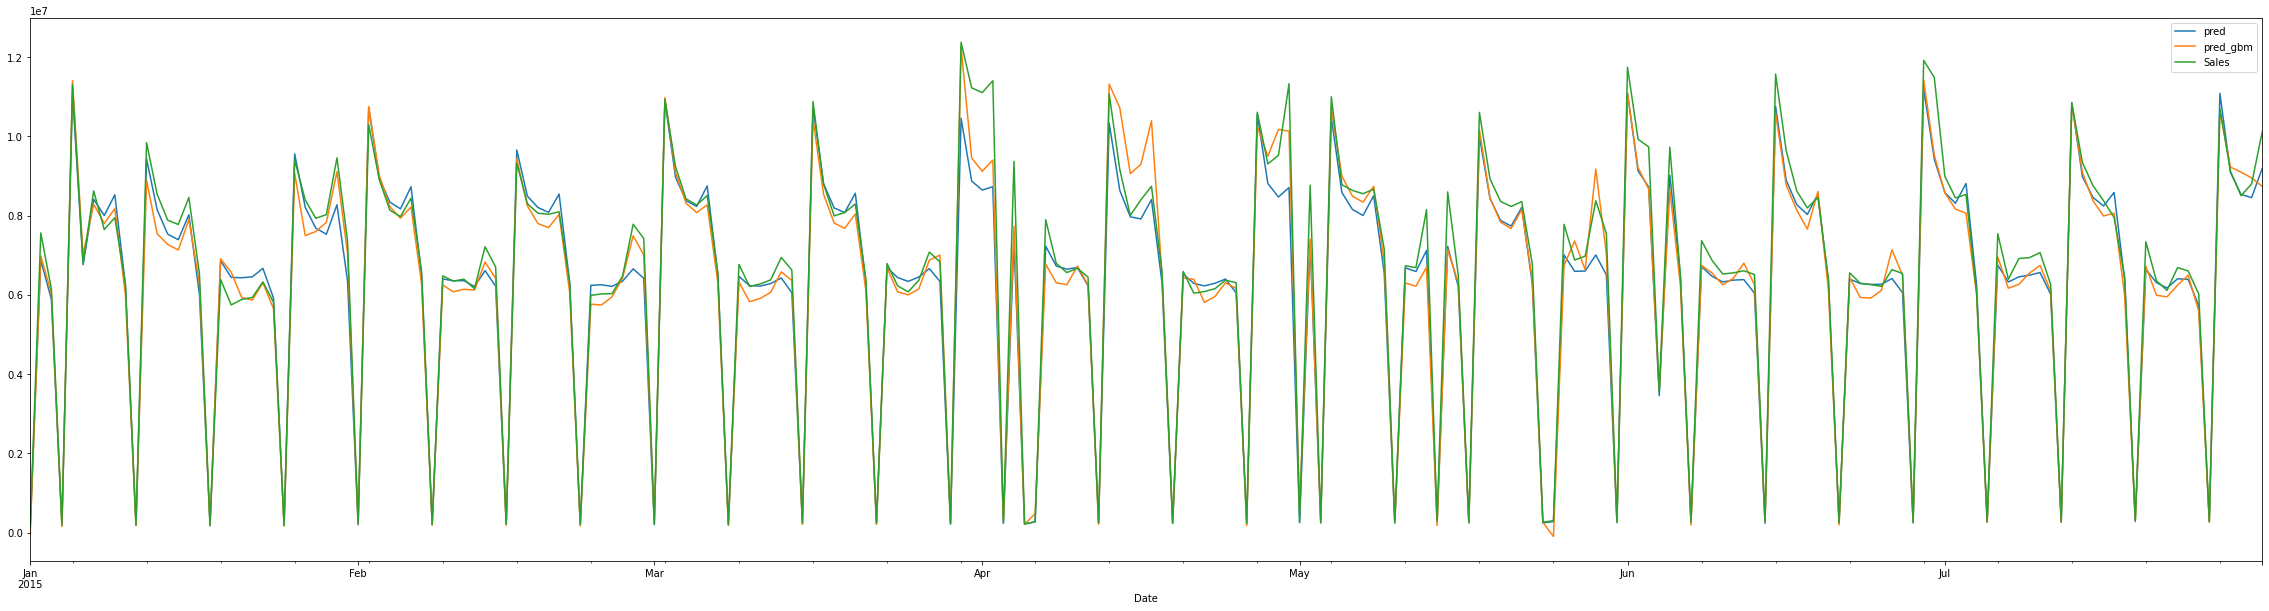

In [24]:
val_data_.groupby("Date").agg({"pred":"sum","pred_gbm":"sum","Sales":"sum"}).plot(figsize=(40,10))

In [29]:
rmse(val_data_.Sales,val_data_.pred_gbm)

954.5098742235094

In [30]:
rmse(val_data_.Sales,val_data_.pred)

1073.9800975922087